In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
cust = pd.read_csv("Customers.csv")

In [3]:
#1
cust.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
cust.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
#2
cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#3
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(0.5, 1.0, 'Распределение клиентов по половому признаку')

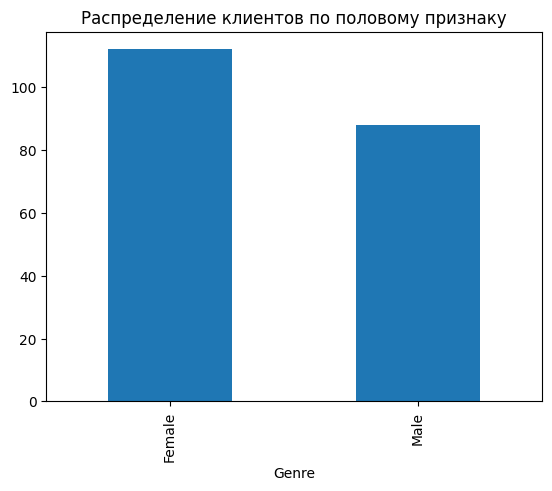

In [7]:
#4
gen_count = cust["Genre"].value_counts()
gen_count.plot(kind="bar")
plt.title('Распределение клиентов по половому признаку')


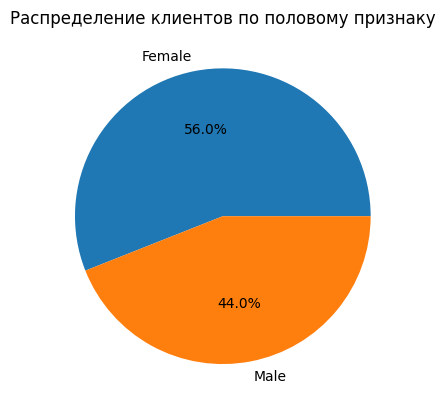

In [8]:
plt.pie(gen_count.values, labels=gen_count.index, autopct='%1.1f%%')
plt.title('Распределение клиентов по половому признаку')
plt.show()

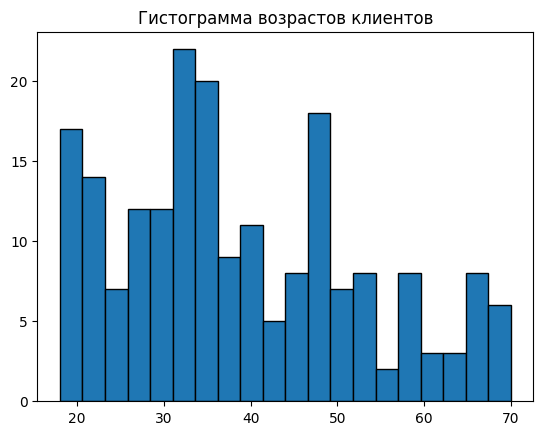

In [9]:
#5
plt.hist(cust['Age'], bins=20, edgecolor='k')
plt.title('Гистограмма возрастов клиентов')
plt.show()


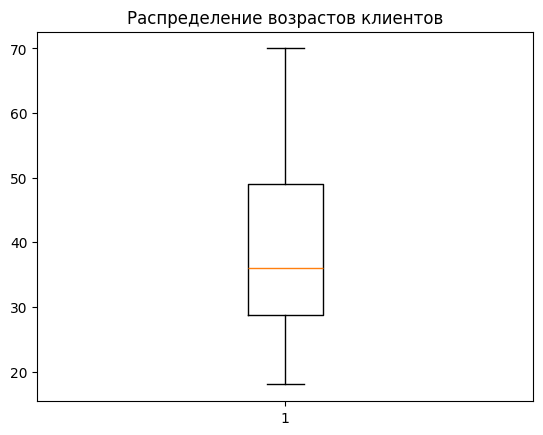

In [10]:
plt.boxplot(cust['Age'])
plt.title('Распределение возрастов клиентов')
plt.show()

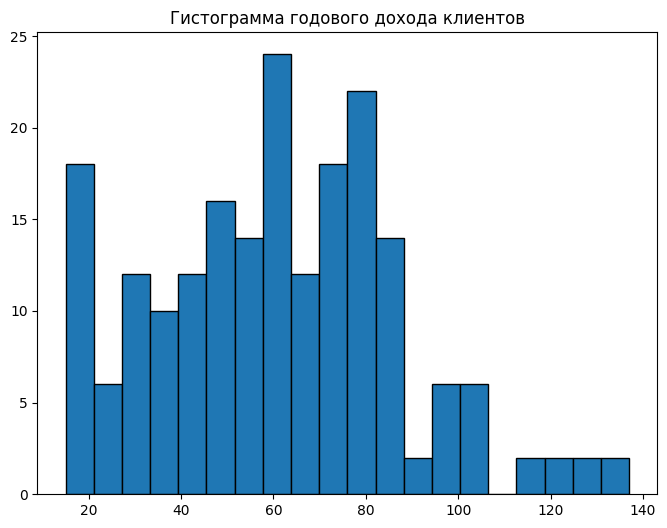

In [11]:
#6
plt.figure(figsize=(8, 6))
plt.hist(cust['Annual Income (k$)'], bins=20, edgecolor='k')
plt.title('Гистограмма годового дохода клиентов')
plt.show()

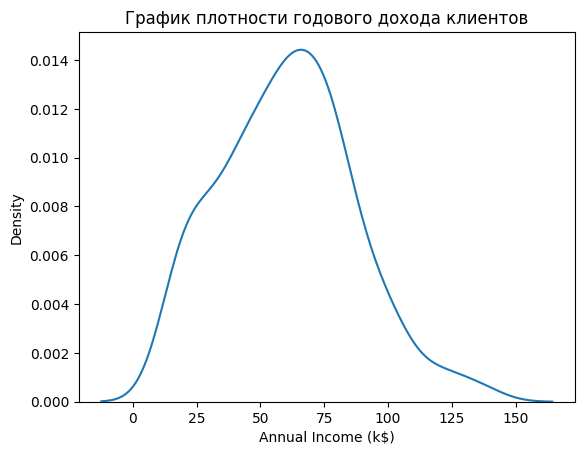

In [12]:
sns.kdeplot(cust['Annual Income (k$)'])
plt.title('График плотности годового дохода клиентов')
plt.show()

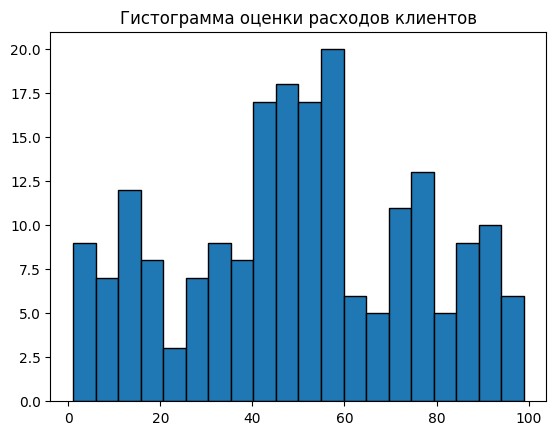

In [13]:
#7
plt.hist(cust['Spending Score (1-100)'], bins=20, edgecolor='k')
plt.title('Гистограмма оценки расходов клиентов')
plt.show()

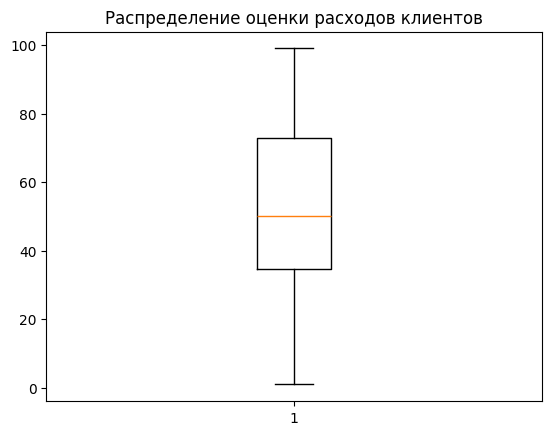

In [14]:
plt.boxplot(cust['Spending Score (1-100)'])
plt.title('Распределение оценки расходов клиентов')
plt.show()

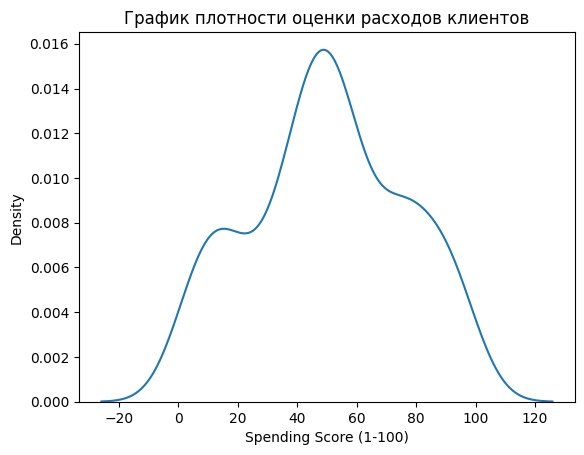

In [15]:
sns.kdeplot(cust['Spending Score (1-100)'])
plt.title('График плотности оценки расходов клиентов')
plt.show()

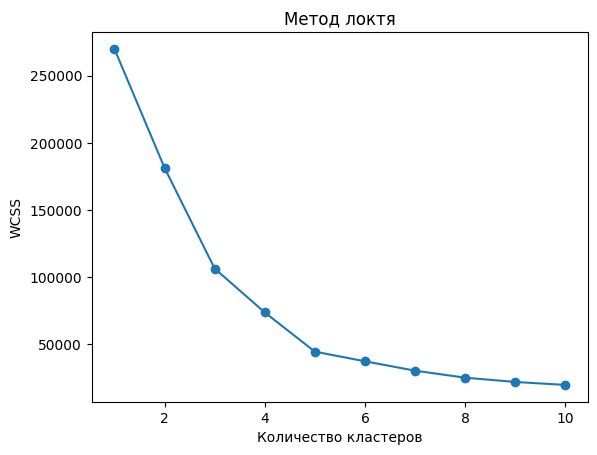

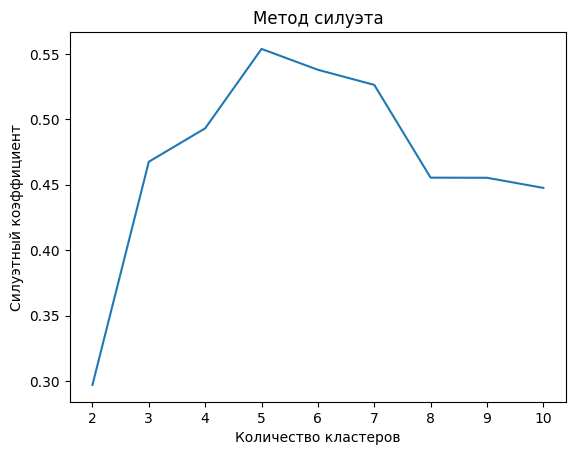

In [16]:
#8
X = cust[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sil_score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)

plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 11), sil_scores)
plt.title('Метод силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.show()

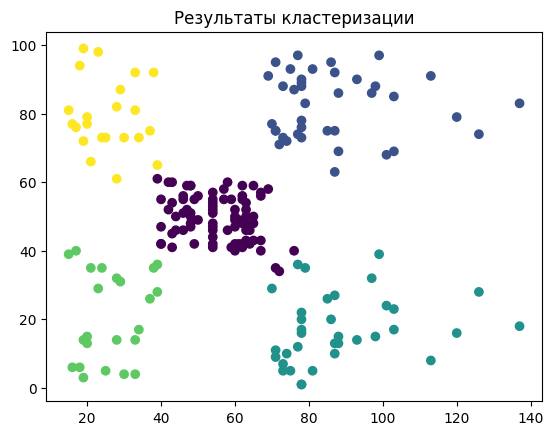

In [17]:
#9
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')
plt.title('Результаты кластеризации')
plt.show()